# This script process the optimization1_quadtree results 

1. Compile the optimization1_quadtree with:
```
make bin/o1qtree
```
2. Run the benchmarking script
```
cd scripts
python3 run_par_optim1_qtree
```
3. The output that we will process is qtree_coffee.txt (renamed from qtree.out)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

experiment ={}

with open("qtree_coffee.txt") as f:
    for line in f:
        tokens = line.split()
        if "Running:" in tokens:
            name=tokens[2].split("/")[3]
            nth=int(tokens[6])
            if name not in experiment:
                experiment[name]={}
        if 'Quadtree' in tokens:
            experiment[name][nth]=[float(tokens[5])]
        if "STAGE" in tokens:
            experiment[name][nth].append(float(tokens[5]))
        if 'Average:' in tokens:
            experiment[name][nth].append(float(tokens[1]))

#print(experiment)

results = {}

for i in experiment:
    results[i]={}
    for j in experiment[i]:
        results[i][j]={}
        results[i][j]['qtree']=experiment[i][j][0]
        results[i][j]['stage1']=mean(experiment[i][j][1:15:3])
        results[i][j]['stage2']=mean(experiment[i][j][2:15:3])
        results[i][j]['stage3']=mean(experiment[i][j][3:15:3])
        results[i][j]['owm']=experiment[i][j][16]
#print(results)
for i in experiment:
    print("Cloud {} has quadtree creation time = {:.2f}".format(i,mean(list(results[i][j]['qtree'] for j in [1,2,4,6,8]))))


Cloud Alcoy has quadtree creation time = 3.18
Cloud Arzua has quadtree creation time = 3.77
Cloud BrionF has quadtree creation time = 4.03
Cloud BrionU has quadtree creation time = 4.50


In [2]:
for i in experiment:
    print("Cloud {} has sequential OWM time = {:.2f}".format(i,results[i][1]['owm'] ))


Cloud Alcoy has sequential OWM time = 12.48
Cloud Arzua has sequential OWM time = 10.03
Cloud BrionF has sequential OWM time = 11.07
Cloud BrionU has sequential OWM time = 12.98


In [21]:
for i in experiment:
    print("Cloud {} has parallel OWM with 8 threads time(speedup) = {:.2f} ({:.1f}x)".format(i,results[i][8]['owm'],results[i][1]['owm']/results[i][8]['owm'] ))

Cloud Alcoy has parallel OWM with 8 threads time(speedup) = 1.98 (6.3x)
Cloud Arzua has parallel OWM with 8 threads time(speedup) = 1.70 (5.9x)
Cloud BrionF has parallel OWM with 8 threads time(speedup) = 3.07 (3.6x)
Cloud BrionU has parallel OWM with 8 threads time(speedup) = 3.89 (3.3x)


# Comparing with baseline

In [42]:
experiment_base ={}
with open("baseline_coffee.txt") as f:
    for line in f:
        tokens = line.split()
        if "Running:" in tokens:
            name=tokens[2].split("/")[3]
            nth=int(tokens[6])
            if name not in experiment_base:
                experiment_base[name]={'seq':{}, 'par':{} }
        if "SEQUENTIAL" in tokens:
            status="seq"
        if 'CORES' in tokens:
            status="par"
        if 'Octree' in tokens:
            experiment_base[name][status][nth]=[float(tokens[5])]
        if "STAGE" in tokens:
            experiment_base[name][status][nth].append(float(tokens[5]))
        if 'Average:' in tokens:
            experiment_base[name][status][nth].append(float(tokens[1]))

#print(experiment_base)

results_base = {}

for i in experiment_base:
    results_base[i]={'seq':{}, 'par':{} }
    results_base[i]['seq']['octree']=experiment_base[i]['seq'][1][0]
    results_base[i]['seq']['stage1']=mean(experiment_base[i]['seq'][1][1:15:3])
    results_base[i]['seq']['stage2']=mean(experiment_base[i]['seq'][1][2:15:3])
    results_base[i]['seq']['stage3']=mean(experiment_base[i]['seq'][1][3:15:3])
    results_base[i]['seq']['owm']=experiment_base[i]['seq'][1][16]
    for j in experiment_base[i]['par']:
        results_base[i]['par'][j]={}
        results_base[i]['par'][j]['octree']=experiment_base[i]['par'][j][0]
        results_base[i]['par'][j]['stage1']=mean(experiment_base[i]['par'][j][1:15:3])
        results_base[i]['par'][j]['stage2']=mean(experiment_base[i]['par'][j][2:15:3])
        results_base[i]['par'][j]['stage3']=mean(experiment_base[i]['par'][j][3:15:3])
        results_base[i]['par'][j]['owm']=experiment_base[i]['par'][j][16]

octree_time = []
quadtree_time = []
for i in experiment_base:
    print("Cloud {} has Octree creation time = {:.2f}".format(i,mean(list(results_base[i]['par'][j]['octree'] for j in [1,2,4,6,8]))))
    octree_time.append(mean(list(results_base[i]['par'][j]['octree'] for j in [1,2,4,6,8])))

for i,z in zip(experiment,range(len(experiment))):
    quadtree_time.append(mean(list(results[i][j]['qtree'] for j in [1,2,4,6,8])))
    print("Cloud {} has quadtree creation time = {:.2f} ({:.2f}x)".format(i,quadtree_time[z],octree_time[z]/quadtree_time[z]))

for i in experiment_base:
    print("Cloud {} has sequential OWM time = {:.2f}".format(i,results_base[i]['seq']['owm'] ))

for i in experiment:
    print("Cloud {} has sequential OWM time WITH opt1 = {:.2f} ({:.2f}x)".format(i,results[i][1]['owm'],results_base[i]['seq']['owm']/results[i][1]['owm'] ))     

for i in experiment_base:
    print("Cloud {} has parallel OWM with 8 threads time(speedup) = {:.2f} ({:.1f}x)".format(i,results_base[i]['par'][8]['owm'],results_base[i]['seq']['owm']/results_base[i]['par'][8]['owm'] ))

for i in experiment:
    print("Cloud {} has parallel OWM with 8 threads and opt1 time(speedup wrt base) = {:.2f} ({:.1f}x)".format(i,results[i][8]['owm'],results_base[i]['par'][8]['owm']/results[i][8]['owm'] ))

Cloud Alcoy has Octree creation time = 4.74
Cloud Arzua has Octree creation time = 5.75
Cloud BrionF has Octree creation time = 5.97
Cloud BrionU has Octree creation time = 6.76
Cloud Alcoy has quadtree creation time = 3.18 (1.49x)
Cloud Arzua has quadtree creation time = 3.77 (1.52x)
Cloud BrionF has quadtree creation time = 4.03 (1.48x)
Cloud BrionU has quadtree creation time = 4.50 (1.50x)
Cloud Alcoy has sequential OWM time = 22.55
Cloud Arzua has sequential OWM time = 22.94
Cloud BrionF has sequential OWM time = 19.75
Cloud BrionU has sequential OWM time = 21.30
Cloud Alcoy has sequential OWM time WITH opt1 = 12.48 (1.81x)
Cloud Arzua has sequential OWM time WITH opt1 = 10.03 (2.29x)
Cloud BrionF has sequential OWM time WITH opt1 = 11.07 (1.78x)
Cloud BrionU has sequential OWM time WITH opt1 = 12.98 (1.64x)
Cloud Alcoy has parallel OWM with 8 threads time(speedup) = 3.73 (6.0x)
Cloud Arzua has parallel OWM with 8 threads time(speedup) = 4.11 (5.6x)
Cloud BrionF has parallel OWM wi

In [31]:
for i in experiment:
    for j in ['stage1','stage2','stage3']:
        print("Cloud {} stage {} time (percent) = {:.4f} ({:.2f}x)".format(i,j,results[i][1][j],results[i][1][j]/results[i][1]['owm']*100))


Cloud Alcoy stage stage1 time (percent) = 12.3776 (99.19x)
Cloud Alcoy stage stage2 time (percent) = 0.0149 (0.12x)
Cloud Alcoy stage stage3 time (percent) = 0.0682 (0.55x)
Cloud Arzua stage stage1 time (percent) = 9.9268 (98.95x)
Cloud Arzua stage stage2 time (percent) = 0.0063 (0.06x)
Cloud Arzua stage stage3 time (percent) = 0.0915 (0.91x)
Cloud BrionF stage stage1 time (percent) = 11.0430 (99.78x)
Cloud BrionF stage stage2 time (percent) = 0.0022 (0.02x)
Cloud BrionF stage stage3 time (percent) = 0.0188 (0.17x)
Cloud BrionU stage stage1 time (percent) = 12.9495 (99.74x)
Cloud BrionU stage stage2 time (percent) = 0.0022 (0.02x)
Cloud BrionU stage stage3 time (percent) = 0.0285 (0.22x)


# Spedup for each cloud

[1.         1.9968795  3.25971108 4.78616907 6.29845548]
[1.         1.89413164 3.05406886 4.47344482 5.90169432]
[1.         2.0238461  3.24361079 3.85147033 3.60260417]
[1.         1.97030169 3.15432084 3.65125566 3.33826138]


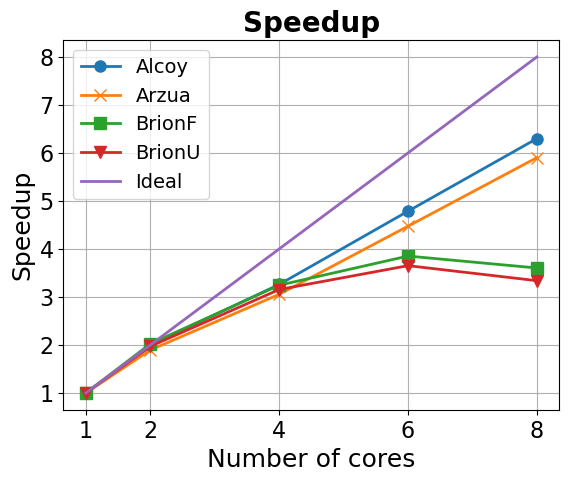

In [18]:
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

fig = plt.figure()

marks=['o-','x-','s-','v-','+-']

for (i,z) in zip(experiment,marks):
    print(np.array([results[i][1]['owm']/results[i][j]['owm'] for j in [1,2,4,6,8]]))
    plt.plot(np.array([1,2,4,6,8]), np.array([results[i][1]['owm']/results[i][j]['owm'] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
plt.plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=[i for i in experiment]
sizes.append('Ideal')
plt.title('Speedup',  fontweight='bold', fontsize=titlefs)
plt.legend(sizes,loc='best', fontsize= legendfs)
plt.ylabel('Speedup', fontsize=ylabelfs)
plt.xlabel('Number of cores', fontsize=xlabelfs)
plt.xticks([1,2,4,6,8],fontsize=xticksfs)
plt.yticks(fontsize=yticksfs)
plt.grid()

plt.show()

In [49]:
pp = PdfPages("Speedup-opt1-quadtree.pdf")
pp.savefig(fig)
pp.close()

In [6]:
output="All_Optimizations.out"

f = open(output, "a")
quadtree_t = []
for i,z in zip(results,range(len(experiment))):
    quadtree_t.append(mean(list(results[i][j]['qtree'] for j in [1,2,4,6,8])))
    print("Opt1-Quadtree; {}; {:.2f}; {:.2f};".format(i,quadtree_t[z],results[i][1]['owm']))
    f.write("Opt1-Quadtree; {}; {:.2f}; {:.2f};\n".format(i,quadtree_t[z],results[i][1]['owm']))

f.close()

Opt1-Quadtree; Alcoy; 3.18; 12.48;
Opt1-Quadtree; Arzua; 3.77; 10.03;
Opt1-Quadtree; BrionF; 4.03; 11.07;
Opt1-Quadtree; BrionU; 4.50; 12.98;
